# Week 12

### Elaboration on Week 11 class discussion: using a for-loop into a while-loop

<div class="alert alert-block alert-danger">
<p><b>BAD CODE, DO NOT DO THIS, ESPECIALLY DURING THE LAB TEST</b></p>
This example is to illustrate that there are many ways to do the same thing in Python, but the readable solution is usually better.
</div>

In [ ]:
my_list = [0]

condition_to_meet = False

for i in my_list:    
    print(len(my_list))  # show number of iterations of the for-loop

    # bad, wrong, please do not do this
    if not condition_to_meet:
        my_list.append(len(my_list))
    if len(my_list) > 5:
        condition_to_meet = True  # stop infinite loop

In [ ]:
# use a while loop instead
i = 0
# condition_to_meet here is: (i > 5)
while not (i > 5):
    i += 1
    print(i)

## Reflections

### Pedagogy
1. Could you share more about how the final exams would be like?
    - Written exam, sample papers for the Finals will be released after the Lab Test.

### Lab Test stuff
1. Offline Python documentation
    - [Dev Docs](https://devdocs.io/) - please make sure to 1) go to `Preferences` to enable Python, and 2) go to `Offline Data` to install the Python documentation to your local machine
    - The Mock Lab Test on Friday is a good time to ensure that it is working as expected
2. I'm curious about the level of difficulty that we should expect for the lab test.
    - Please check the past year Lab Tests on eLearn. The difficulty should be similar to the Labs provided
3.  3* questions in Lab 7 was pretty difficult. Could you share some tips on how to tackle questions like these during exams
    - **Write your pseudocode** - you need to have a good idea of the solution logic before starting to code
    - Break the question into smaller parts. 
        - For example, if the question requires you to iterate through the file and print a sum of month + each transaction in that month
        - Just print the month output first. Once that is working, you can move on to getting the monthly transactions. 
    - Personally, data structures, identifying the correct way to store the data simplifies finding the solution.
        - What kind of data structure(s) do you need for the example above?

### Content
1. i better understood when to use while-loop vs for-loop. Like the question where with have to go though every line in the .txt file given, a for-loop is use since it will be able to know how many lines are there in the fine (I initially thought a while-loop have to be use since we wont know the specific number of lines in each of the given file - misunderstood the question)
    - Very good point. Technically you don't know how many lines there are in the file, so it seems like a while loop would be appropriate.
    - Another way to think about it may be to think about whether you want to iterate over all elements
        - "Is there another line in the file?" - for-loop, as you want to iterate through all the lines in the file
        - "Does PIN 1 match PIN 2 now?" - while-loop, as you want to stop asking the user for a new PIN once they match 

2. How do you add multiple values to a key in the dictionary
    - Dictionaries are key-value (note the singular "value") pairs, each unique key can only refer to a single value
        - This is not possible: `my_dict = {'a': 1, 'b': 2,4,  'c': 3}`
    - Use an [iterable](https://docs.python.org/3/glossary.html#term-iterable) type (e.g., List, String, Tuple, etc.) as the value to store multiple bits of data
        - This is possible: `my_dict = {'a': 1, 'b': [2, 4], 'c': 3}`

3. (Challenging) using files with loops with dictionary
4. trying to implement whileloops and forloops into the code
    - Again, file I/O, loops, dictionaries are all in service of the logic in your solution. Pseudocode helps to structure your solution in a logical manner, after which your knowledge of the Python syntax (loops, etc.) will allow you to implement the solution

6. differentiating {} and [] for use in dictionary
    - Use curly brackets (`{}`) when you want to create a dictionary
    - Use square brackets (`[]`) when you want to create a list
    - Use square brackets _after a variable name_ to do an indexing (List) or lookup (Dictionary) operation

7. answers and score for quiz 4

## Quiz 4
Class average: 6.3, std dev: 2.3

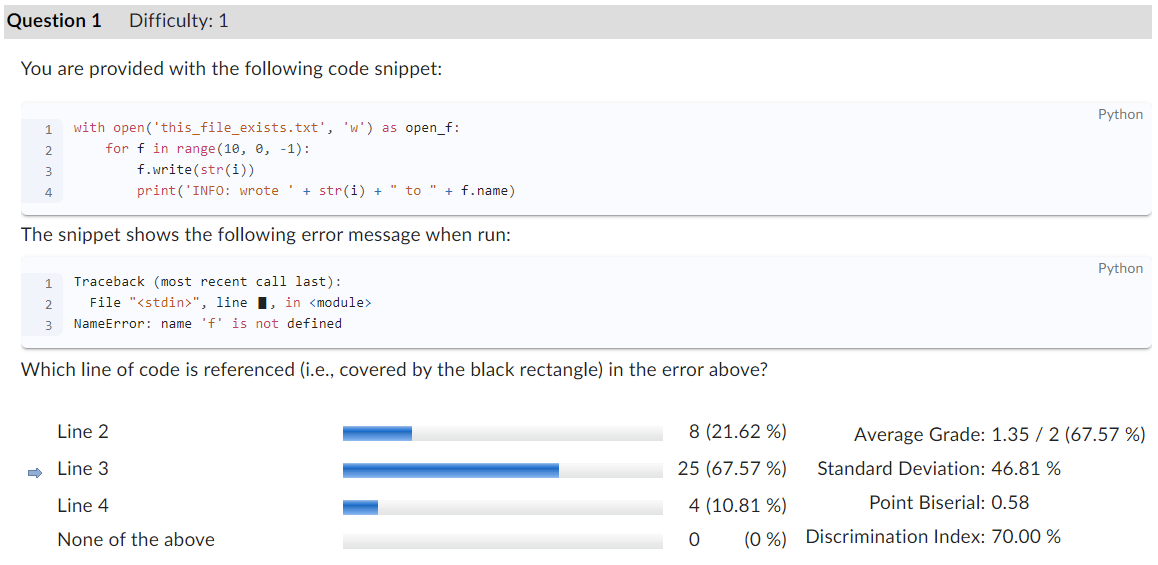
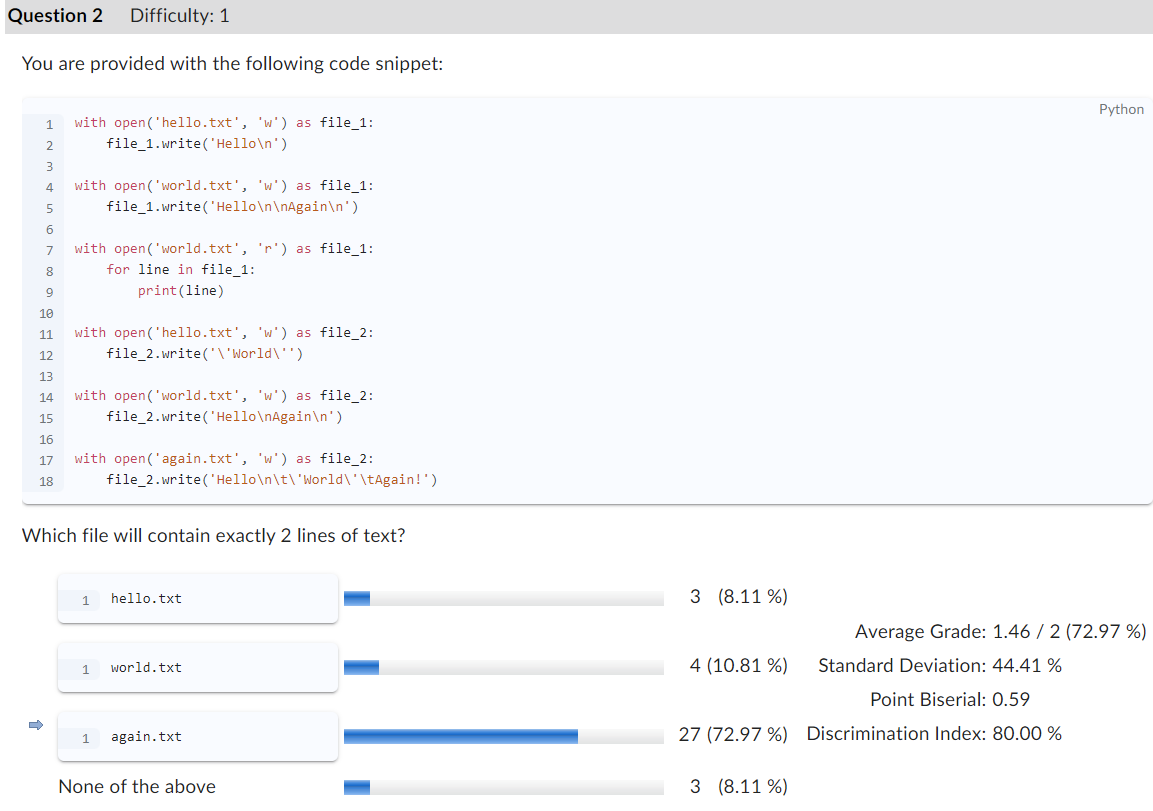
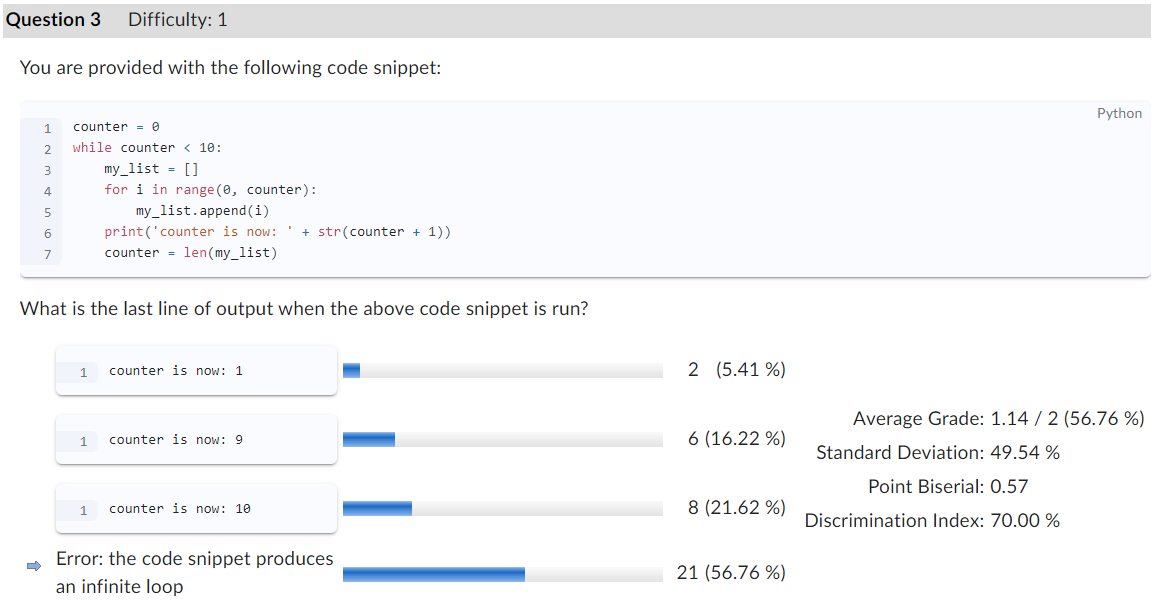

---

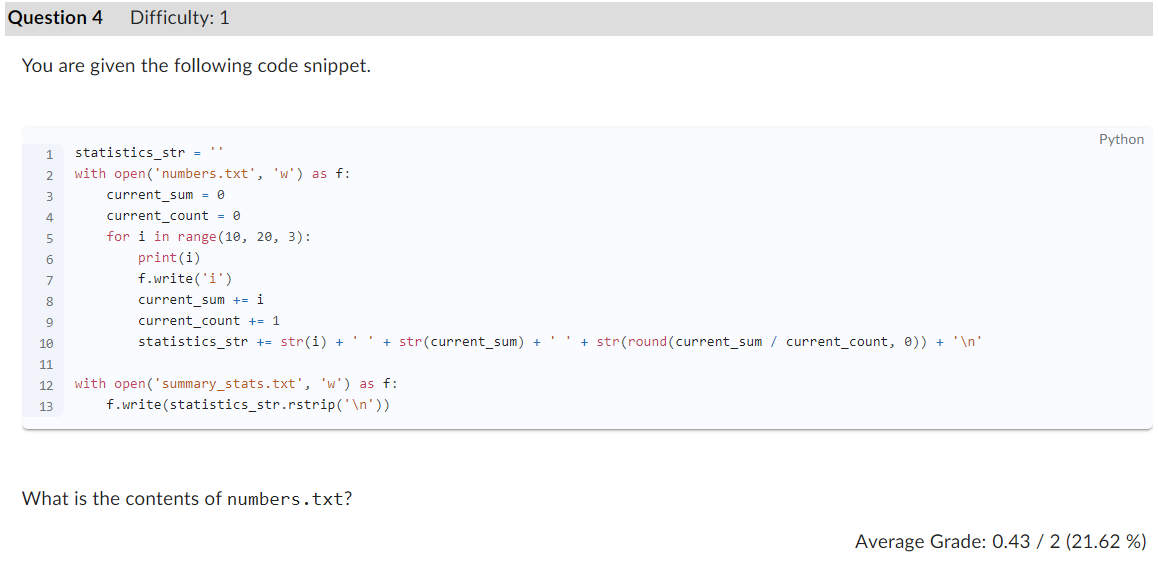
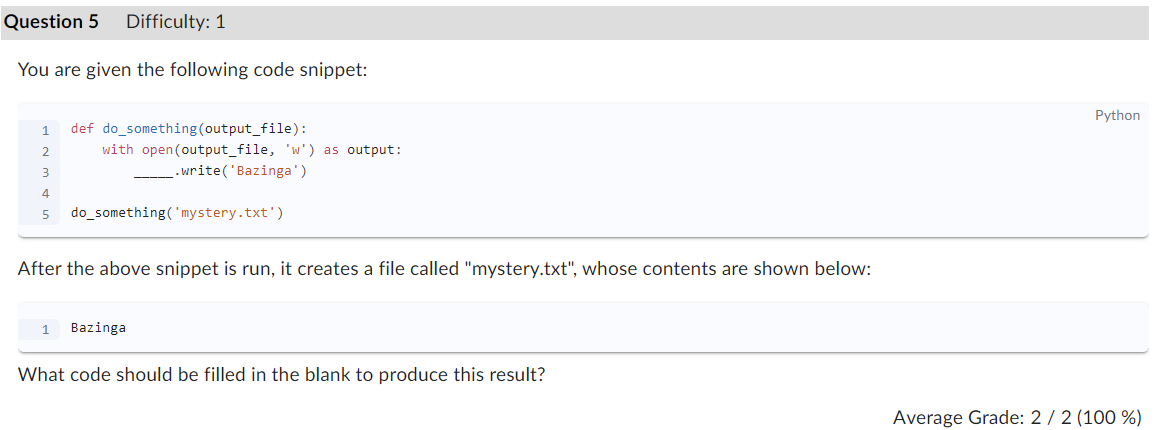

## Week 11 ICE

### Qn 5

```

- some how my result look like this:

Enter a person's name: Michelle Lee
Michelle Lee has 2 number(s):
['(+65)67894321', '(+65)88776655']

```


In [ ]:
phonebook_dict = {}
with open('contacts.txt', 'r') as f:
    for line in f:
        name, number = line.rstrip('\n').split('|')
        if name in phonebook_dict:
            phonebook_dict[name].append(number)
        else:
            phonebook_dict[name] = [number]

person = input('Enter a person\'s name: ')

if person not in phonebook_dict:
    print(person + ' cannot be found in our database.')
else:
    person_numbers = phonebook_dict[person]
    print(person + ' has ' + str(len(person_numbers)) + ' number(s):')
    # print('\t' + str(person_numbers))  # wrong, do not print the entire list of numbers!
    for num in person_numbers:
        print('\t' + num)

### Lab 7 Qn 7

1. How do we know which special characters to be included? Is it based on what is written in the input_file?
    - No, it is given in the question
    - `Challenge yourself to leave the punctuations [, ' ! .] in the content untouched in the original place.`

2.  Why do we need to use join? And how do we get '' ?
```
while (result == word):
       random.shuffle(my_list)
       scrambled_midle_word = ''.join(my_list)
       result = word[0] + scrambled_midle_word + word[len(word)-1]
return result
```
    - `str.join()` is a `String` method that combines all the elements in an iterable with the `str` provided. For example:
```
my_list = ['1', '2', '3']
result = 'hello'.join(my_list)
print(result)  # "1hello2hello3"
```

In [ ]:
# Solution
import random


def scramble(word):
    
    if len(word) <= 3:
        return word
    
    middle_word = word[1:len(word)-1]
    my_list = list(middle_word)
    
    same_char = True
    for ch in my_list:
        if ch != my_list[0]:
            same_char = False
    
    # If the characters in the middle are the same, no matter how we scramble
    # the letters, the word will not change.
    if same_char:
        return word
    
    result = word
    # We keep scrambling the leters in the middle until the resulting word
    # is different
    while (result == word):
        random.shuffle(my_list)
        scrambled_midle_word = ''.join(my_list)
        result = word[0] + scrambled_midle_word + word[len(word)-1]
    
    return result


special_characters =  ",'!."

with open('talk.txt','r') as my_file:
    for line in my_file:
        line = line.rstrip('\n')
        words = line.split()
        scrambled_line = []
        for word in words:
            last_char = word[len(word)-1]
            if last_char in special_characters:
                word = word[0:len(word)-1]
                scrambled_word = scramble(word)
                full_scrambled_word = scrambled_word + last_char
            else:
                full_scrambled_word = scramble(word)
            scrambled_line.append(full_scrambled_word)  
        for word in scrambled_line:
            print(word, end = ' ' )
        print('\n')